### **Company Bankruptcy Prediction data:** 
This dataset contains Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009. The dataset contains 6.8K rows and 96 financial features. This is a classification problem to identify whether the company is bankrupt or not. The target variable is Bankrupt that contains values 1(Yes) and 0(No).

Notebook 1, Data Preprocessing

In [1]:
#importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
import missingno as msno
from sklearn.model_selection import train_test_split
%matplotlib inline
!pip install missingno

In [2]:
#connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Choosing the Directory
os.chdir("./drive/MyDrive/Colab Notebooks")
#os.chdir("./drive/MyDrive/Colab_Notebooks/MLDM_project/")
#print(os.listdir("input_data/"))


In [5]:
#Reading the dataset
df_bankruptcy = pd.read_csv('data.csv', encoding='iso-8859-1')

In [ ]:
#splitting the data into input features and target varialbbles 
X_df = df_bankruptcy.iloc[:, 1:]
y_df = df_bankruptcy.iloc[:, 0]

In [ ]:
#Checking for null values
column_with_null = []
for column in X_df.columns:
  if X_df[column].isnull().values.any():
    column_with_null.append(column)

if len(column_with_null) > 0:
  print('Columns with empty value:', column_with_null)
else:
  print('There is NO empty value!')

There is NO empty value!


### 2. Visualisation 
Tasks carried out: \
2.1 visualising to see if any values are missing \
2.2 Check the distribution of labels \
2.2 Correlation matrix


**2.1 Check for missing values**

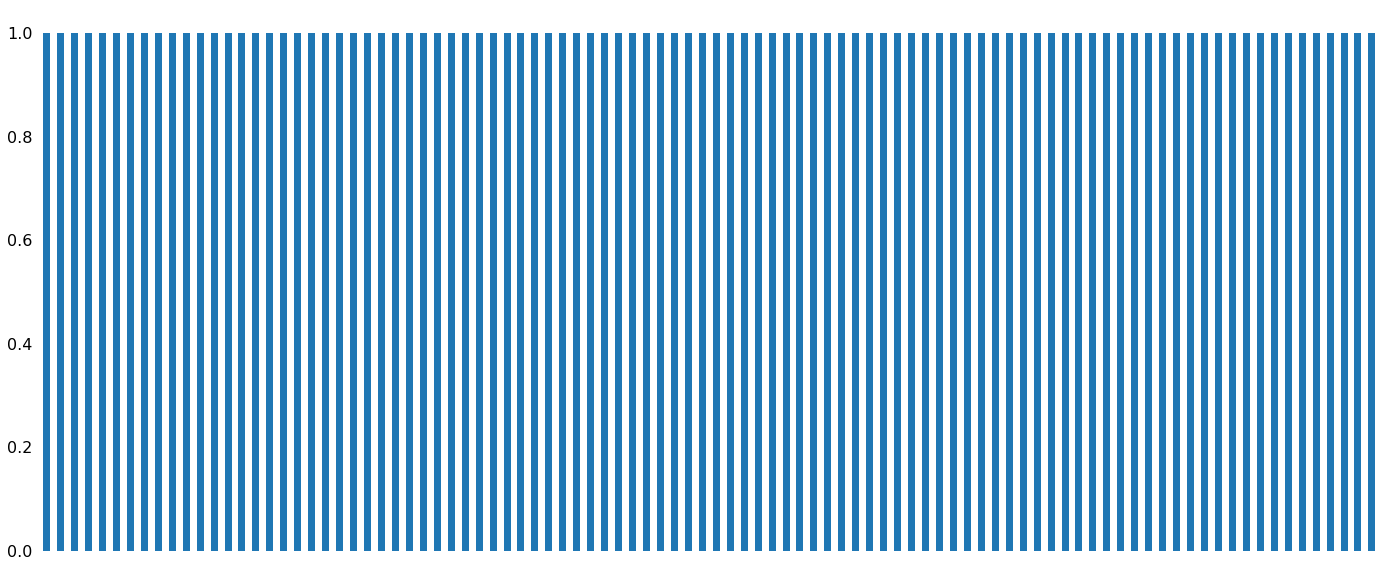

In [ ]:
#plotting to check for missing values
msno.bar(df_bankruptcy, sort= 'descending', color="tab:blue")

As seen from the graph above, there are no missing values among the features in the data-set

**2.2 Checking the distribution of labels**

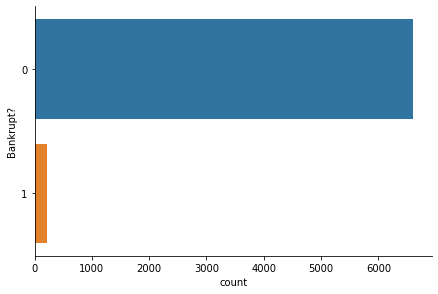

In [6]:
#plotting to check the distribution of labels
ax = sns.catplot(y="Bankrupt?",kind='count', data=df_bankruptcy, height=4, aspect=12/8)

**2.3 Plotting the correlation matrix**

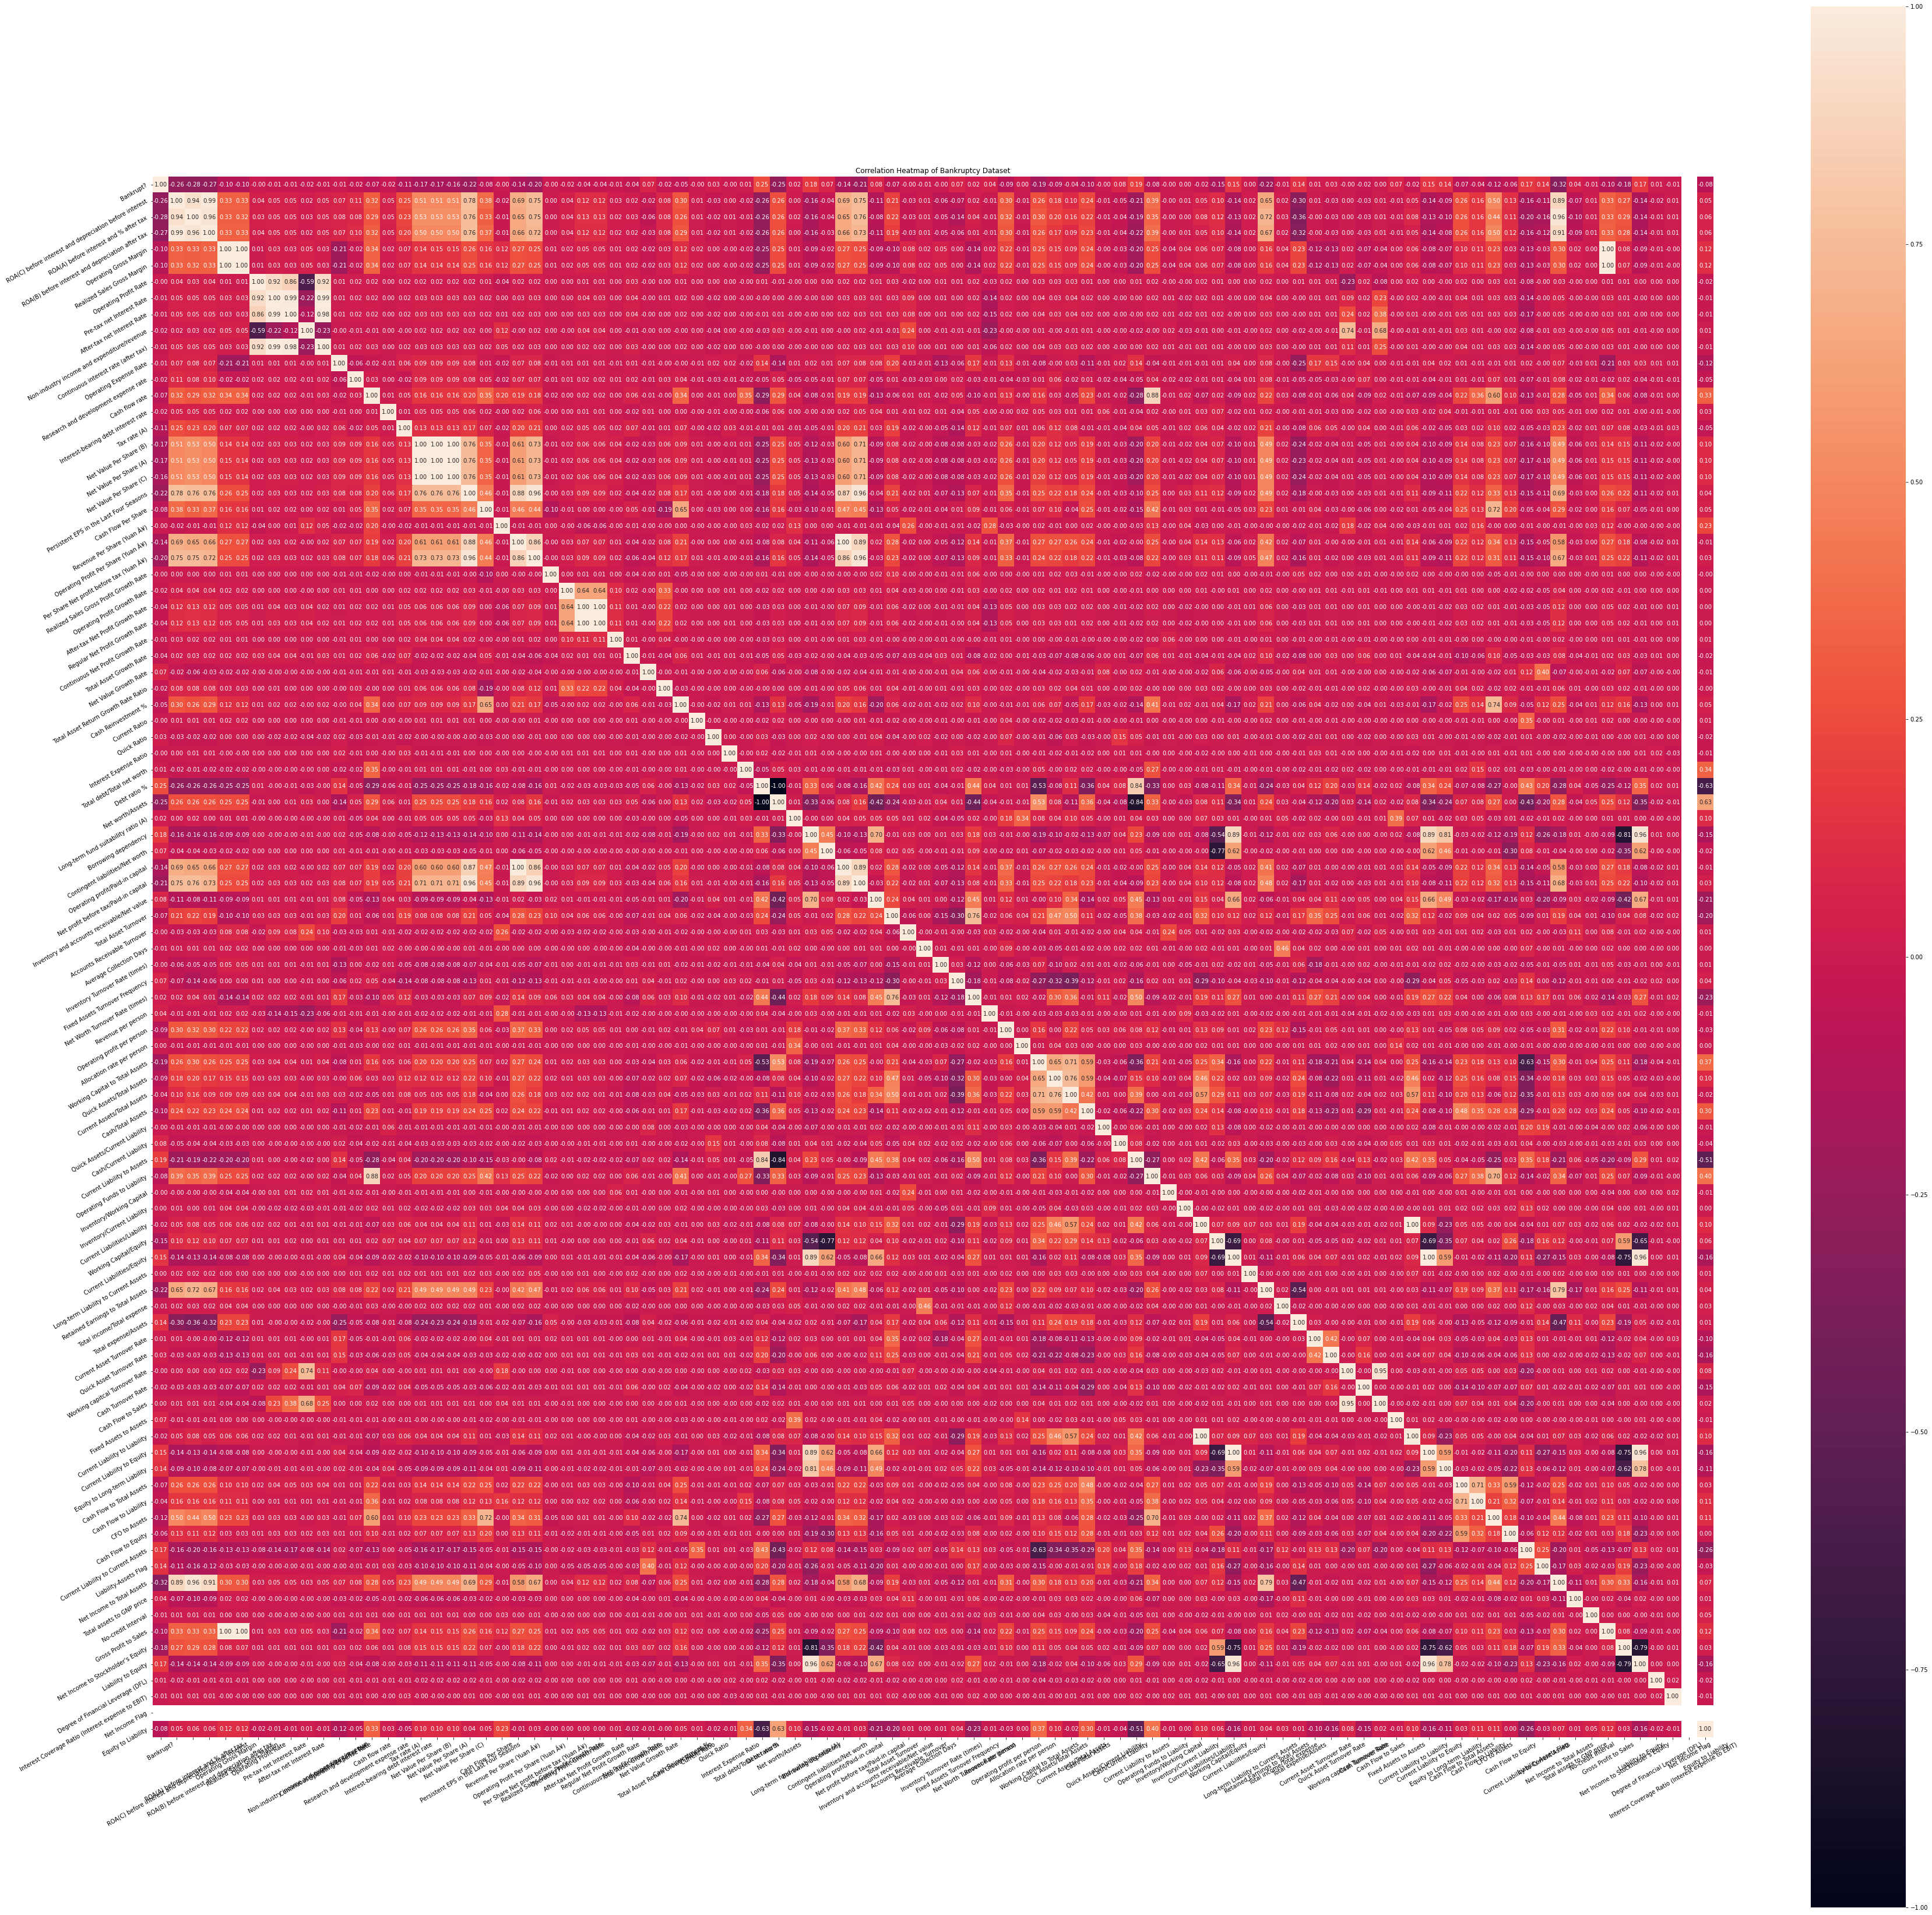

In [ ]:
correlation = df_bankruptcy.corr()
plt.figure(figsize=(60,60))
plt.title('Correlation Heatmap of Bankruptcy Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

### 3. Data Preparation


**3.1 One-hot Encoding**

In [ ]:
#Check discrete/continuous
#If discrete, turn to one-hot encoding, or remove it if meaningless
df_categorical = X_df.select_dtypes(include='int64')
print(df_categorical)
# drop Net Income Flag column (only have 1 value)
X_df.drop(columns=[' Net Income Flag'], inplace=True)


# X_df[' Liability-Assets Flag'].unique() # 0,1
# X_df[' Net Income Flag'].unique() # all 1

       Liability-Assets Flag   Net Income Flag
0                          0                 1
1                          0                 1
2                          0                 1
3                          0                 1
4                          0                 1
...                      ...               ...
6814                       0                 1
6815                       0                 1
6816                       0                 1
6817                       0                 1
6818                       0                 1

[6819 rows x 2 columns]


**3.2 Handling outliers**

In [ ]:
#Check and remove outliers

def checkOutlier(dataset):
  sd_limit = 3
  outlier_cols = {}       # Store column names that contain outliers
  for column in dataset.columns:
    # q1, q3= np.percentile(dataset[column],[25,75])
    # iqr = q3 - q1
    # lower_bound = q1 -(1.5 * iqr) 
    # upper_bound = q3 +(1.5 * iqr)

    # no_of_outliers = len(dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)].index)

    upper_bound = dataset[column].mean() + sd_limit * dataset[column].std()
    lower_bound = dataset[column].mean() - sd_limit * dataset[column].std()
    
    outliers = dataset[(dataset[column] > upper_bound) | (dataset[column] < lower_bound)]
    non_outliers = dataset[-((dataset[column]>upper_bound) | (dataset[column]<lower_bound))]
    no_of_outliers = len(outliers.index)

    if no_of_outliers > 0:
      outlier_cols[column] = (no_of_outliers, non_outliers[column].mean())

      # replace by mean
      dataset.loc[(dataset[column] > upper_bound) | (dataset[column] < lower_bound), column] = non_outliers[column].mean()
  

  return dataset, outlier_cols


X_df, outlier_result = checkOutlier(X_df)
print(outlier_result)

{' ROA(C) before interest and depreciation before interest': (88, 0.505915272951658), ' ROA(A) before interest and % after tax': (110, 0.5607109556670145), ' ROA(B) before interest and depreciation after tax': (101, 0.5549947347710749), ' Operating Gross Margin': (63, 0.6080715716935693), ' Realized Sales Gross Margin': (63, 0.6080522842453188), ' Operating Profit Rate': (2, 0.9989583518946721), ' Pre-tax net Interest Rate': (7, 0.7974015284871112), ' After-tax net Interest Rate': (7, 0.8093112763549064), ' Non-industry income and expenditure/revenue': (6, 0.3035271607761112), ' Continuous interest rate (after tax)': (7, 0.7815747468877257), ' Research and development expense rate': (35, 1909567187.500194), ' Cash flow rate': (89, 0.46688496698639836), ' Interest-bearing debt interest rate': (146, 1116289.5257938206), ' Tax rate (A)': (114, 0.10469569184598225), ' Net Value Per Share (B)': (115, 0.18810694202894013), ' Net Value Per Share (A)': (115, 0.1881127562519804), ' Net Value Pe

**3.3 Normalising the data using StandarScaler()**

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_df))
print(X_scaled)

            0         1         2   ...            91        92            93
0    -2.573733 -2.546874 -2.878171  ... -2.169873e-01 -0.522744 -9.269221e-01
1    -0.791672 -0.420305 -0.737931  ...  1.438557e-13  1.781959 -7.769501e-01
2    -1.518590 -1.152586 -1.594853  ... -2.379063e-01 -0.652200 -9.267358e-01
3    -2.017418 -2.044767 -1.875676  ... -1.732439e-01 -0.291963 -6.664179e-01
4    -0.777764 -0.416231 -0.630557  ... -1.059374e+00  3.829606 -2.674277e-01
...        ...       ...       ...  ...           ...       ...           ...
6814 -0.232576 -0.396880 -0.226874  ... -5.733544e-03  0.283679 -4.615877e-01
6815 -0.584909 -0.419286 -0.594422  ... -3.110944e-02  0.217825 -1.705744e-01
6816 -0.631268 -0.503819 -0.662563  ... -1.301754e-01 -0.105710  1.887675e+00
6817  0.006639 -0.014953 -0.018322  ... -1.161001e-01 -0.051859  2.794368e-02
6818 -0.244630  0.175501 -0.105047  ... -1.293571e-01 -0.102493  3.127526e-15

[6819 rows x 94 columns]


 **3.4 Dimensionaly reduction**

3.4.1 Removing the highly correlated features

In [ ]:
#Dimensionality reduction 1: Remove highly-correlated features
cor_matrix = X_scaled.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
X_scaled_drop = X_scaled.drop(X_scaled.columns[to_drop], axis=1)
print(X_scaled_drop.head())

         0         1         3   ...            91        92        93
0 -2.573733 -2.546874 -0.572698  ... -2.169873e-01 -0.522744 -0.926922
1 -0.791672 -0.420305  0.187326  ...  1.438557e-13  1.781959 -0.776950
2 -1.518590 -1.152586 -0.573322  ... -2.379063e-01 -0.652200 -0.926736
3 -2.017418 -2.044767 -2.123944  ... -1.732439e-01 -0.291963 -0.666418
4 -0.777764 -0.416231 -0.804199  ... -1.059374e+00  3.829606 -0.267428

[5 rows x 82 columns]


3.4.2 dimensionality reduction using PCA

In [ ]:
#Dimensionality reduction 2: Use of models (PCA/MDS) (have to tune hyperparameters, e.g. n_components)
from sklearn.decomposition import PCA

explained_variance_ratio = .95 # 53 columns
pca = PCA(explained_variance_ratio)
X_scaled_pca = pca.fit_transform(X_scaled_drop)
pd.DataFrame(X_scaled_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,10.317512,-0.442399,-1.743793,2.116031,-1.330954,0.234355,0.138928,0.304591,-0.163910,-0.575906,-0.430977,2.210496,0.234803,-0.157547,-1.040637,-2.058963,0.937600,-1.172579,0.338259,-0.454091,-0.414486,0.473513,-0.198523,-0.507548,-0.867663,0.033588,-0.602338,0.287846,0.978052,-0.080052,0.733048,-0.046879,-0.308127,0.093753,0.273350,-0.897909,0.432901,0.353571,-0.716771,-0.181553,-2.203337,0.245090,0.709753,-1.214890,-1.157930,0.164986,0.349170,-0.891690,0.597493,0.082577,0.372535,0.888756,-0.084716
1,3.492301,0.893382,-2.938005,-0.073215,0.480743,1.417530,-0.205969,0.601416,-0.636198,-1.077061,1.406585,-1.924851,-0.220727,-0.043651,-2.350565,2.420071,0.825826,0.123512,-2.884992,-0.770718,1.537385,-1.480357,0.059235,0.429246,-0.131034,3.205408,-0.252565,2.507087,0.230824,-0.042678,-0.100797,0.121108,-0.231685,0.981418,1.351999,-0.776465,-0.190409,0.279518,0.700981,0.076188,-0.558969,-0.058550,0.462511,-0.587977,-0.806555,0.378752,0.405425,0.527432,0.143136,-0.749834,0.031676,0.143898,0.297754
2,5.409665,0.574743,1.682949,0.318195,0.152389,2.270083,-0.314498,0.331468,0.617211,0.744605,-0.798344,-1.326039,0.593057,-1.670886,0.588245,-0.177634,0.661585,-0.331815,0.219681,0.110581,-0.066711,0.137525,-0.026286,0.016455,0.028741,-0.427136,0.452306,0.909754,0.144821,0.162817,-0.748224,0.167415,0.032318,-0.038361,-0.527245,0.218640,-0.314307,-0.700339,-0.439622,-0.625272,1.010239,0.250305,0.323387,0.382598,0.877979,0.465596,-0.052128,-0.290205,-1.143490,-0.079048,-0.129969,-0.335737,0.593254
3,7.057260,1.727715,-1.956631,0.672609,-0.396968,-2.326604,1.093215,0.260372,0.293442,-1.478869,-0.408589,0.359865,0.723094,-0.689660,-0.604733,0.193336,-0.038100,-0.055472,-0.409796,0.404307,-0.115500,-0.094469,0.063179,0.145626,-0.435035,-0.070694,-0.245116,-0.983184,-1.027783,-0.533812,0.539141,0.532940,0.045590,1.029100,0.381003,-0.720826,0.386811,-0.135122,0.386463,-0.112919,0.011043,-0.692226,-0.873884,0.652535,0.384461,-0.148201,0.961476,-1.121932,-0.137820,0.304356,1.032636,0.523903,0.675504
4,2.746304,-0.751901,-1.115332,-0.497678,0.461528,-1.395425,1.437371,-0.733448,-0.645759,-1.404411,3.902313,0.244800,0.444991,-0.469866,-1.369120,1.292540,-0.748626,0.916017,-2.471182,-0.209831,1.312929,-1.495971,-0.026547,0.329427,0.345635,2.312170,0.004574,3.567241,-0.066615,0.262499,0.473159,-0.150141,-1.123616,-0.498253,2.236317,-0.374671,-1.532097,0.191379,-0.438270,-0.122094,-0.397824,-0.856440,1.012788,0.578830,0.031136,-0.757566,0.091232,-0.405067,0.027014,0.161705,0.122373,0.337274,0.226703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,1.180897,0.449154,0.059838,-0.336373,-0.526682,0.362374,-0.732947,0.190586,-0.059533,-0.130892,0.300455,-0.035149,-0.229475,0.016937,1.059329,0.121951,-0.599284,0.286490,0.183122,0.443238,0.043699,-0.285388,0.036810,0.296163,0.536871,-0.213886,-0.134747,0.698508,-0.019701,0.002601,-0.106798,0.476454,-0.152084,-0.036080,0.103842,-0.672268,0.277101,-0.823197,-0.498210,0.150206,0.763637,-0.073150,0.157057,0.062063,0.089641,-0.065682,-0.038440,-0.289520,0.034699,0.134149,0.216880,-0.380331,0.357408
6815,1.164425,0.284228,-0.288512,-1.341522,0.131503,-0.154975,0.158111,-0.599308,0.127724,0.446086,1.483379,0.005054,-1.045141,0.688888,1.445121,1.701057,1.516620,-0.069089,-0.394286,-0.457190,-0.669917,0.544439,-0.256579,-0.167364,-1.361576,-0.014628,1.371135,0.046786,-0.752581,0.274453,0.501083,-1.007446,0.420914,0.946525,-0.031533,1.967857,0.674107,0.239460,0.219433,1.070101,-0.576918,-0.939689,0.000185,-0.061418,0.312274,-0.530983,0.714534,0.123156,-0.547200,0.204575,-0.019046,0.127240,0.169543
6816,-2.239100,3.044257,1.939982,-1.146594,0.274387,-0.650384,0.945285,0.043953,-0.116221,0.366419,0.135

**3.5 Splitting the data into stratified testing and training sets** \
80% is used for training and 20% is used for testing

In [ ]:
#Stratifed 80-20 train-test split
# X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X_scaled_drop, y_df, test_size=0.20, random_state=1, stratify=y_df)
# X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X_scaled_pca, y_df, test_size=0.20, random_state=1, stratify=y_df)
X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X_scaled_pca, y_df, test_size=0.20, random_state=1, stratify=y_df)
X_train_train_imbalanced, X_train_val, y_train_train_imbalanced, y_train_val = train_test_split(X_train_imbalanced, y_train_imbalanced, test_size=0.20, random_state=1, stratify=y_train_imbalanced)

**3.6 Handling imbalance in the dataset**

In [ ]:
#Checking for imbalance
print(y_train_train_imbalanced.value_counts())
print(y_test.value_counts())

0    4223
1     141
Name: Bankrupt?, dtype: int64
0    1320
1      44
Name: Bankrupt?, dtype: int64


In [ ]:
#Installing SMOTE
!pip install imbalanced-learn

In [ ]:
#Apply SMOTE(oversampling) to training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_imbalanced, y_train_imbalanced)
X_train_train, y_train_train = smote.fit_resample(X_train_train_imbalanced, y_train_train_imbalanced)
print(pd.DataFrame(y_train_train).value_counts())

1    4223
0    4223
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(y_train)

10558

In [ ]:
#Combine X and y
preprocessed_train = np.concatenate([X_train, y_train.reshape(10558,-1)], axis=1)
preprocessed_train_train = np.concatenate([X_train_train, y_train_train.reshape(8446,-1)], axis=1)
preprocessed_train_val = np.concatenate([X_train_val, np.array(y_train_val).reshape(1091,-1)], axis=1)
preprocessed_test = np.concatenate([np.array(X_test), np.array(y_test).reshape(1364,-1)], axis=1)
preprocessed_train_imbalanced = np.concatenate([np.array(X_train_imbalanced), np.array(y_train_imbalanced).reshape(5455,-1)], axis=1)

In [ ]:
#Save into .npy for later use
np.save('input_data/bankruptcy_train.npy', preprocessed_train)
np.save('input_data/bankruptcy_train_train.npy', preprocessed_train_train)
np.save('input_data/bankruptcy_train_val.npy', preprocessed_train_val)
np.save('input_data/bankruptcy_test.npy', preprocessed_test)
np.save('input_data/bankruptcy_train_imbalanced.npy', preprocessed_train_imbalanced)

### 4. Baseline models for comparison




4.1 Naive Bayes 

In [ ]:
#Base model 1 (NB)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
nvc = GaussianNB()
nvc.fit(X_train, y_train)
y_pred = nvc.predict(X_test)
nvc_cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', 'TP =', nvc_cm[1][1], ', FP =', nvc_cm[0][1], 
     ', TN =', nvc_cm[0][0], ', FN =', nvc_cm[1][0])
print('Testing Accuracy = ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['class 0(Non-bankcrupt)', 'class 1(Bankcrupt)']))

Confusion Matrix: TP = 28 , FP = 139 , TN = 1181 , FN = 16
Testing Accuracy =  0.8863636363636364
                        precision    recall  f1-score   support

class 0(Non-bankcrupt)       0.99      0.89      0.94      1320
    class 1(Bankcrupt)       0.17      0.64      0.27        44

              accuracy                           0.89      1364
             macro avg       0.58      0.77      0.60      1364
          weighted avg       0.96      0.89      0.92      1364



4.2 Support Vector Machines

In [ ]:
#Base model 2 (SVM)
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', 'TP =', svm_cm[1][1], ', FP =', svm_cm[0][1], 
     ', TN =', svm_cm[0][0], ', FN =', svm_cm[1][0])
print('Testing Accuracy = ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['class 0(Non-bankcrupt)', 'class 1(Bankcrupt)']))

Confusion Matrix: TP = 17 , FP = 72 , TN = 1248 , FN = 27
Testing Accuracy =  0.9274193548387096
                        precision    recall  f1-score   support

class 0(Non-bankcrupt)       0.98      0.95      0.96      1320
    class 1(Bankcrupt)       0.19      0.39      0.26        44

              accuracy                           0.93      1364
             macro avg       0.58      0.67      0.61      1364
          weighted avg       0.95      0.93      0.94      1364

